<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/ADS/8960_Candida_Noronha_ADS_Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No.: 8960
### <b>Practical 5 - House price prediction using NN

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEM 8/Applied Data Science/Experiment5/housepricedata.csv')

In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Features in the first ten columns:

* Lot Area (in sq ft)
* Overall Quality (scale from 1 to 10)
* Overall Condition (scale from 1 to 10)
* Total Basement Area (in sq ft)
* Number of Full Bathrooms
* Number of Half Bathrooms
* Number of Bedrooms above ground
* Total Number of Rooms above ground
* Number of Fireplaces
* Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:

* Is the house price above the median or not? (1 for yes and 0 for no)


In [ ]:
dataset = df.values

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]

In [ ]:
Y = dataset[:,10]

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Building and Training our First Neural Network

First Step: Setting up the Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Second Step: Filling in the best numbers

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6829 - accuracy: 0.5117 - val_loss: 0.6816 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5117 - val_loss: 0.6770 - val_accuracy: 0.5023
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5137 - val_loss: 0.6726 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5235 - val_loss: 0.6679 - val_accuracy: 0.5251
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.5479 - val_loss: 0.6628 - val_accuracy: 0.5982
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6321 - val_loss: 0.6578 - val_accuracy: 0.6256
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6644 - val_loss: 0.6527 - val_accuracy: 0.6575
Epoch 8/100
3

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.8813


0.8812785148620605

Visualizing Loss and Accuracy

In [ ]:
import matplotlib.pyplot as plt

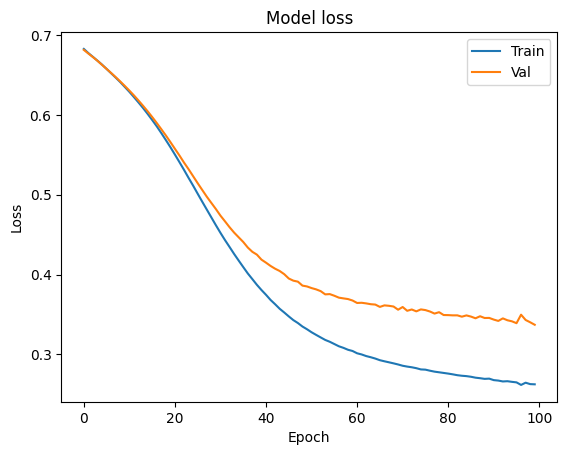

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

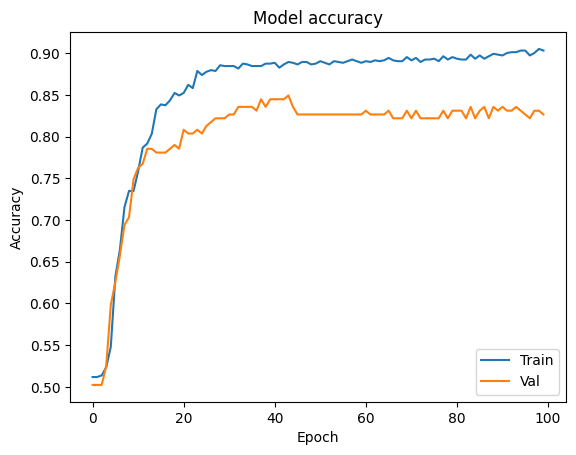

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Adding Regularization to our Neural Network

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 0.4756 - accuracy: 0.7828 - val_loss: 0.4202 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 2s 62ms/step - loss: 0.3381 - accuracy: 0.8679 - val_loss: 0.3586 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 2s 76ms/step - loss: 0.3219 - accuracy: 0.8718 - val_loss: 0.3695 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 2s 54ms/step - loss: 0.2801 - accuracy: 0.8875 - val_loss: 0.3410 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2566 - accuracy: 0.8933 - val_loss: 0.2987 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.2355 - accuracy: 0.9022 - val_loss: 0.3397 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 44ms/step - loss: 0.2262 - accuracy: 0.9041 - val_loss: 0.2944 - val_accuracy: 0.8721
Epoch 

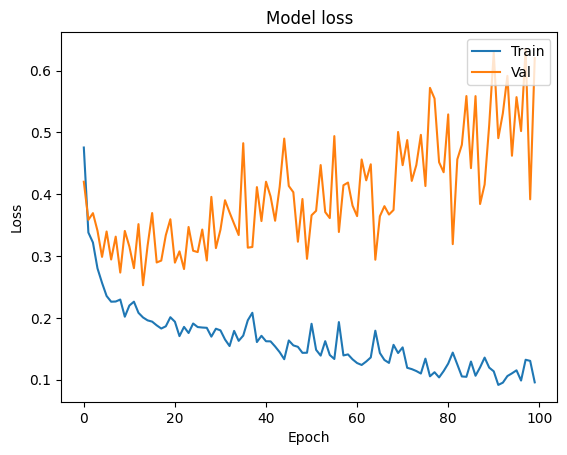

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

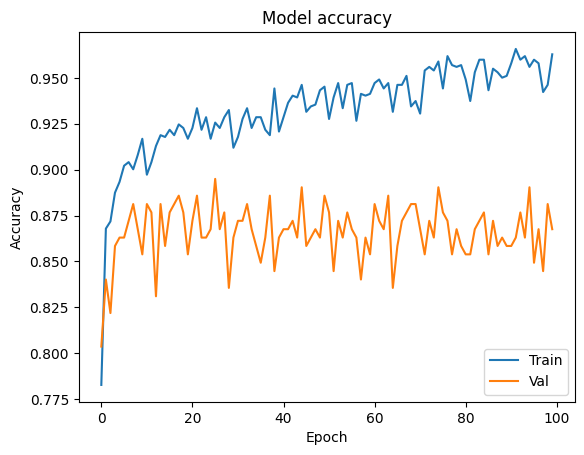

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

L2 regularization and dropout

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 67ms/step - loss: 14.2232 - accuracy: 0.6047 - val_loss: 3.9029 - val_accuracy: 0.7671
Epoch 2/100
32/32 [==============================] - 3s 88ms/step - loss: 1.6642 - accuracy: 0.8493 - val_loss: 0.7465 - val_accuracy: 0.7945
Epoch 3/100
32/32 [==============================] - 2s 67ms/step - loss: 0.5520 - accuracy: 0.8718 - val_loss: 0.5481 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4960 - accuracy: 0.8738 - val_loss: 0.5311 - val_accuracy: 0.8402
Epoch 5/100
32/32 [==============================] - 2s 56ms/step - loss: 0.4918 - accuracy: 0.8640 - val_loss: 0.5124 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4723 - accuracy: 0.8748 - val_loss: 0.5165 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4612 - accuracy: 0.8875 - val_loss: 0.4994 - val_accuracy: 0.8356
Epoch

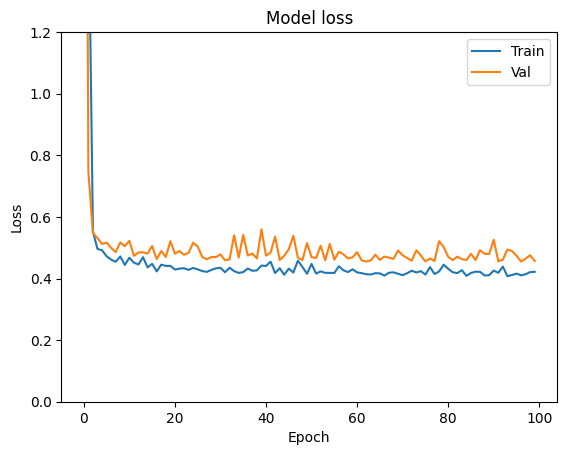

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

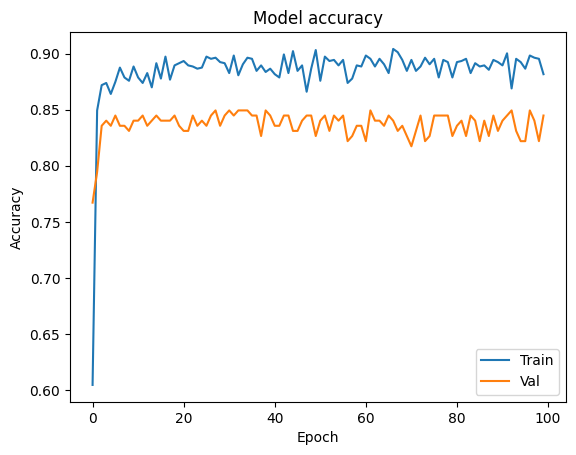

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()